In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/home/sergio/Downloads/semeion.data', sep=' ', header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593 entries, 0 to 1592
Columns: 267 entries, 0 to 266
dtypes: float64(257), int64(10)
memory usage: 3.2 MB


In [3]:
labels = 1*df.iloc[:,257]+2*df.iloc[:,258]+3*df.iloc[:,259]+4*df.iloc[:,260]+5*df.iloc[:,261]+6*df.iloc[:,262]+7*df.iloc[:,263]+8*df.iloc[:,264]+9*df.iloc[:,265]

In [61]:
from sklearn.cross_validation import train_test_split
from conformal_predictors.nc_measures.SVM import SVCDistanceNCMeasure
from conformal_predictors.predictors.SVC import ConformalSVC
from conformal_predictors.predictors.SVC import ConformalNuSVC
from sklearn.decomposition import PCA

pca = PCA(n_components=25)
X = pca.fit_transform(df.loc[:, range(0,255)].values)
Y = labels.values
nc = SVCDistanceNCMeasure()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)
X_proper_train, X_calibration, y_proper_train, y_calibration = train_test_split(X_train, y_train, test_size=0.5, random_state=42)
nc = SVCDistanceNCMeasure()
# C=1000.0, kernel='rbf', gamma=0.01
cp = ConformalSVC(nc, C=2000.0, kernel='rbf', gamma=0.00001)
cp.fit(X_proper_train, y_proper_train)
cp.calibrate(X_calibration, y_calibration)
y_pred, credibility, confidence = cp.predict_cf(X_test)



In [62]:
from sklearn.metrics import precision_score, accuracy_score, f1_score, roc_auc_score

print(precision_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

0.8546046284
0.84012539185
0.903700896687
0.899686520376


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sampl

(0.05, 1.05)

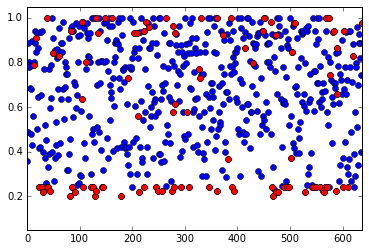

In [63]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

idx = np.ix_(y_pred != y_test)[0]
idx_2 = np.ix_(y_pred_2 != y_test)[0]
idx_3 = np.ix_(y_pred != y_pred_2)[0]

plt.plot(range(0,len(credibility)), credibility, 'ob')
plt.plot(np.array(range(0,len(credibility)))[idx], credibility[idx], 'or')
#plt.plot(np.array(range(0,len(credibility)))[idx_2], credibility[idx_2], 'og')
plt.axis('tight')
plt.ylim([0.05, 1.05])

In [77]:
intervals = np.concatenate(np.arange(0,1,.1), np.array([1]))
print(intervals)
prob = np.array([0.0] * len(intervals))
for i in range(len(intervals) - 1):
    idx = np.ix_((credibility >= intervals[i]) & (credibility < intervals[i + 1]))[0]
    idx_mis = np.ix_(y_pred[idx] != y_test[idx])[0]
    print(len(idx))
    print(len(idx_mis))
    prob[i] = 0 if len(idx) == 0 else len(idx_mis) / (len(idx) * 1.0)

plt.bar(intervals, prob, width=0.1)

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  if __name__ == '__main__':


ValueError: zero-dimensional arrays cannot be concatenated

In [7]:
y_pred_3, credibility_3, confidence_3 = cp.predict_cf(X_test[idx_3, :])
print(y_test[idx_3])

[2 8 8 8 1 8 1 5 6 7]
